In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score , mean_squared_error

In [3]:
cars_data = pd.read_csv('LinearRegression_CarPrice.csv')
#cars_data.head()

In [4]:
df = pd.DataFrame(cars_data)
first_df =  pd.DataFrame(cars_data)

# find the unique number of cylanders

n = df.nunique(axis=0)

uniqueValues = (df['cylindernumber']).unique()
print(uniqueValues)
#print(n)

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [5]:
#change one of the catagorical features to numeric features 
varlist =  ['cylindernumber']

def cylander_map(x):
    return x.map({'two': 2 , "three": 3 , 'four': 4 , "five": 5 , 'six': 6 , "eight": 8 ,'twelve': 12})


df[varlist] = df[varlist].apply(cylander_map)

In [6]:
  
print(df['cylindernumber'])

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64


In [7]:
  df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# drop categorical features (except sylander number which we convert it to numeric feature In the previous step)
df = df.drop(['car_ID' , 'symboling' ,  'CarName', 'fueltype' , 'aspiration' ,'doornumber','carbody' ,'drivewheel' ,'enginelocation' , 'enginetype' , 'fuelsystem'] , axis=1)
#Selecting a custom variable (here for the first part of Q1 we choose horsepower as x_index)
horse = df['horsepower'].tolist()



In [9]:
#get prices as y_index
price = df['price'].tolist()

In [10]:

#implement functions for gradient descent

J = list()
h_teta = list()
tetas = list()
def Derivative_gradient(x, y, teta): 
        res = teta[0] + teta[1] * x - y
        return res.mean(), (res * x).mean()

def gradient_descent( gradient, x, y, start, itr , learn_rate=0.00008  ,  tolerance=0.0005):
    start_point = start
    for i in range(itr):
        diff = -learn_rate * np.array(gradient(x, y, start_point))
        if np.all(np.abs(diff) <= tolerance):
            break
        start_point += diff
        tetas.append(start_point[1])
        h_teta = [start_point[0] + start_point[1] * xval for xval in horse]
        J.append(1/(2*len(horse)) * (sum([(h_teta - y)**2 for h_teta , y in zip(h_teta , price)])))
    return start_point

np.seterr(divide='ignore', invalid='ignore')
optimal_teta = gradient_descent(Derivative_gradient, np.array(horse) , np.array(price), [10, 10] , 200)




In [11]:
optimal_teta   # the result of algorithm

array([  3.53480453, 131.97426482])

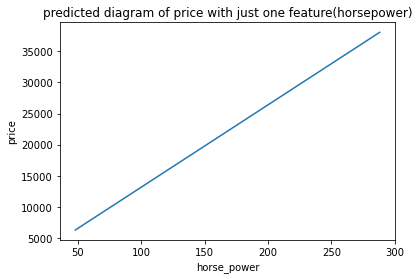

In [12]:

x_ind = np.linspace(min(horse), max(horse), len(horse))
y1 = optimal_teta[1] * x_ind + optimal_teta[0] 
plt.figure()
plt.plot(x_ind, y1)  



plt.xlabel("horse_power")
plt.ylabel("price")
plt.title("predicted diagram of price with just one feature(horsepower)")
#plt.scatter(x_ind , price)
plt.show() 
# we see the horse power as x_label and price as y_label and th linear diagram and original prices 


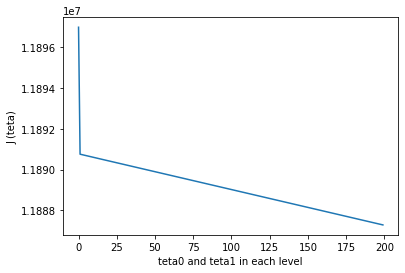

In [13]:

plt.xlabel("teta0 and teta1 in each level")
plt.ylabel("J (teta)")
plt.plot(J) 
# the diagram of J(teta) while gradient descent algorithm goes on

In [14]:
'''
x_teta1 = np.linspace(min(tetas), max(tetas), len(tetas))
plt.xlabel("teta1")
plt.ylabel("J (teta)")
plt.plot(x_teta1 , J)
'''


'\nx_teta1 = np.linspace(min(tetas), max(tetas), len(tetas))\nplt.xlabel("teta1")\nplt.ylabel("J (teta)")\nplt.plot(x_teta1 , J)\n'

C:\Users\Azarbadgan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.8072876924642327
0.0075427983086865675


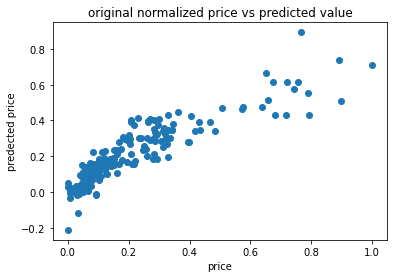

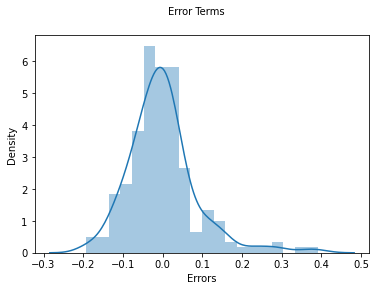

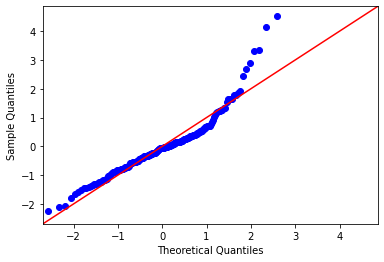

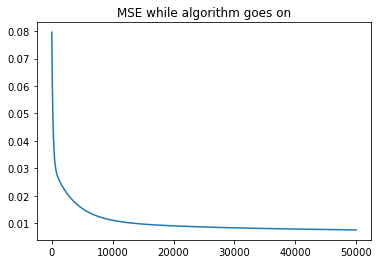

In [15]:
#our model - multi features - without reducing features
mse_all_level =[]
normalized_df = (df-df.min())/(df.max()-df.min())
D = np.full(15 , 0.0001)  # all features
X = [np.array(1)]

J1 = list()
normalized_price = normalized_df.pop('price').to_numpy()

for i in normalized_df.columns.values:
       X.append(normalized_df[i].to_numpy())      
def multi_gradient(X, Y , D):
        SUM = D[0]
        for i in range(len(D)) :
            if (i != 0 ):
                SUM+= D[i] * X[i]
        SUM = SUM  - Y              
        return [np.mean((SUM * X[i])) for i in range(len(D))]

def gradient_multi( gradient, x, y, start, itr , state  ,  learn_rate=0.0008  ,  tolerance=0.0005   ):
    start_point = start
    for i in range(itr):
        diff = -learn_rate * np.array(gradient(x, y, start_point))
        start_point += diff
        if(state == 0 ):
            H = start_point[0]
            for i in range(len(D)) :
                if (i != 0 ):
                    H+= start_point[i] * X[i]
            J1.append(mean_squared_error(y, H))
        
    return start_point
 
optimal_tetas = gradient_multi(multi_gradient, X , normalized_price , D , 50000 , 0)
#print(optimal_tetas)
y_pred = optimal_tetas[0]
for i in range(len(D)) :
            if (i != 0 ):
                y_pred+= optimal_tetas[i] * X[i]
plt.scatter(normalized_price, y_pred )
plt.title("original normalized price vs predicted value")

plt.xlabel("price")
plt.ylabel("predected price")

fig = plt.figure()
sns.distplot((normalized_price - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10) 

print(r2_score(y_true = normalized_price, y_pred = y_pred))

print(mean_squared_error(normalized_price, y_pred))

diif = normalized_price - y_pred
sm.qqplot(diif,fit=True,line='45')
plt.show()


plt.title("MSE while algorithm goes on")

plt.plot(J1) 

In [16]:
df.head()


,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train = (df_train-df_train.min())/(df_train.max()-df_train.min())


In [18]:
df_test = (df_test - df_test.min())/(df_test.max()-df_test.min())


In [19]:
y_train = df_train.pop('price')
X_train = df_train

C:\Users\Azarbadgan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.8592818641073117
0.006315027824471819


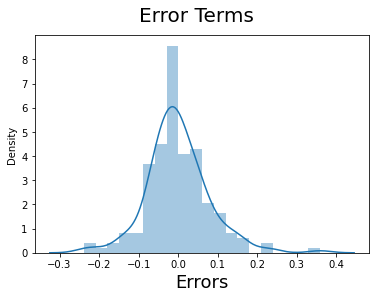

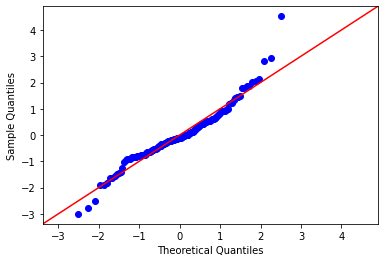

In [20]:
#python model - multi features - without reducing features
#test implemented function with python's library's functions
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()


y_train_price = lr_1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

print(r2_score(y_true = y_train, y_pred = y_train_price))

print(mean_squared_error(y_train, y_train_price))

diif = y_train - y_train_price
sm.qqplot(diif,fit=True,line='45')
plt.show()

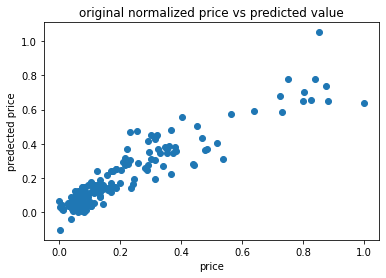

In [21]:
plt.scatter(y_train, y_train_price );
plt.title("original normalized price vs predicted value")

plt.xlabel("price")
plt.ylabel("predected price")
plt.show()

In [22]:
y_test1 = df_test.pop('price')
X_test1 = df_test
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test1)

# Making predictions using the final model
y_pred_m4 = lr_1.predict(X_test_m4)


In [23]:
r2_score(y_true = y_test1, y_pred = y_pred_m4)

0.5102953222595366

In [24]:

'''
plt.figure(figsize = (30,30))
sns.pairplot(first_df)
plt.show()
'''


'\nplt.figure(figsize = (30,30))\nsns.pairplot(first_df)\nplt.show()\n'

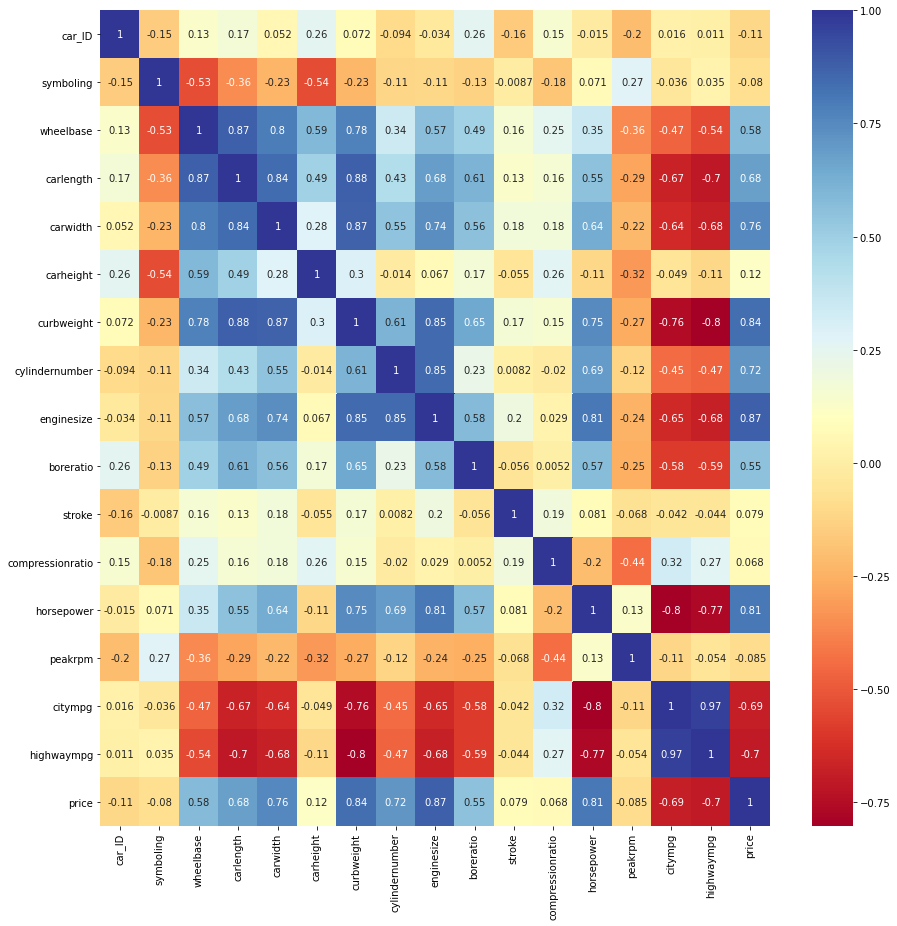

In [25]:

plt.figure(figsize = (15,15))
sns.heatmap(first_df.corr(), annot = True ,cmap = 'RdYlBu')
plt.show()

In [26]:
df = df.drop(['carheight' , 'stroke' ,'compressionratio' , 'peakrpm'  , 'citympg' , 'highwaympg'] , axis = 1 )


   wheelbase  carlength  carwidth  curbweight  cylindernumber  enginesize  \
0       88.6      168.8      64.1        2548               4         130   
1       88.6      168.8      64.1        2548               4         130   
2       94.5      171.2      65.5        2823               6         152   
3       99.8      176.6      66.2        2337               4         109   
4       99.4      176.6      66.4        2824               5         136   

   boreratio  horsepower    price  
0       3.47         111  13495.0  
1       3.47         111  16500.0  
2       2.68         154  16500.0  
3       3.19         102  13950.0  
4       3.19         115  17450.0  


C:\Users\Azarbadgan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


        variables        VIF
0       wheelbase  24.324404
1       carlength  59.978975
2        carwidth  38.628248
3      curbweight  54.208913
4  cylindernumber  16.449658
5      enginesize  26.453636
6       boreratio  12.891662
0.8051572685992796
0.007626183525390337


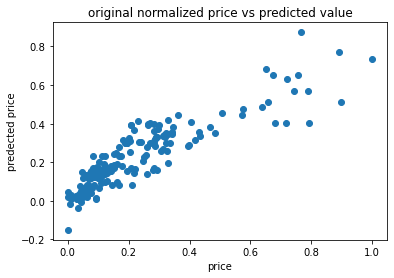

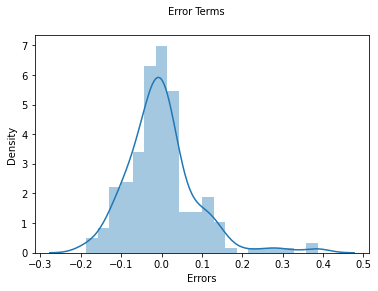

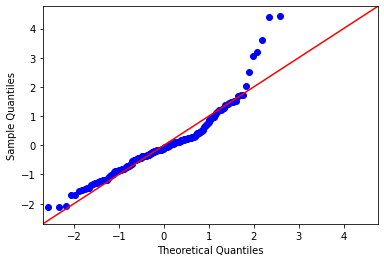

In [27]:
#our model - multi features - with reducing features

print(df.head())

reduced_df = (df-df.min())/(df.max()-df.min())
D1 = np.full(9 , 0.0001)               
X1 = [np.array(1)]

price_r = reduced_df.pop('price').to_numpy()

for i in reduced_df.columns.values:
       X1.append(reduced_df[i].to_numpy())      

opt_r  = gradient_multi(multi_gradient, X1 , price_r , D1 , 50000 ,   1)

#print(optimal_tetas)

y_pred1 = opt_r[0]

for i in range(len(D1)) :
            if (i != 0 ):
                y_pred1+= opt_r[i] * X1[i]
                
plt.scatter(price_r  , y_pred1 )
plt.title("original normalized price vs predicted value")

plt.xlabel("price")
plt.ylabel("predected price")

fig = plt.figure()
sns.distplot((price_r - y_pred1), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10) 

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X_reduced = reduced_df.iloc[:,:-1]
print(calc_vif(X_reduced))

print(r2_score(y_true = price_r, y_pred = y_pred1))

print(mean_squared_error(price_r, y_pred1))

diff = price_r - y_pred1
sm.qqplot(diff,fit=True,line='45')
plt.show()

C:\Users\Azarbadgan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.8153188910726922
0.008287960426221494


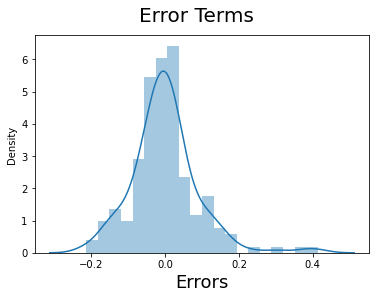

In [28]:
#python model - multi features - with reducing features

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train = (df_train-df_train.min())/(df_train.max()-df_train.min())
df_test = (df_test - df_test.min())/(df_test.max()-df_test.min())
y_train = df_train.pop('price')
X_train = df_train
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()


y_train_price = lr_2.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

print(r2_score(y_true = y_train, y_pred = y_train_price))

print(mean_squared_error(y_train, y_train_price))

In [29]:
#r2_score for test data set after removing useless features
y_test1 = df_test.pop('price')
X_test1 = df_test

X_test_m4 = sm.add_constant(X_test1)

y_pred_m4 = lr_2.predict(X_test_m4)
r2_score(y_true = y_test1, y_pred = y_pred_m4)

0.7316470186572948

In [30]:
mean_squared_error(y_test1, y_pred_m4)

0.013032832783841687

#another way to choose reduce features : n_features_to_select limits the number of good features
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select = 3, step = 1)
selector = selector.fit(X_train, y_train)

list(zip(X_train.columns,selector.support_,selector.ranking_))

In [31]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select = 3, step = 1)
selector = selector.fit(X_train, y_train)

list(zip(X_train.columns,selector.support_,selector.ranking_))


[('wheelbase', False, 5),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', False, 3),
 ('enginesize', True, 1),
 ('boreratio', False, 6),
 ('horsepower', False, 2)]